<img src="./src/logo.png" width="250">

**Baustein:** Regression  $\rightarrow$ **Subbaustein:** Übung: Einfache Lineare Regression $\rightarrow$ **Übungsserie**

**Version:** 1.0, **Lizenz:** <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND 4.0</a>

***
# Übungsblatt X (REG-UEB-001)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import display
from sklearn.preprocessing import StandardScaler

from src.Regression_widget import WidgetRegression
from src.tests import test_exercise_11, test_exercise_12, test_exercise_21
from src.utils import read_csv_data

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## Übung 1 Interaktive Simulation

In [5]:
widget_instance = WidgetRegression()
display(widget_instance.layout)

### Aufgabe 1.1 Bedeutung der Parameter 


In [13]:
# SOLUTION
# solution_11 = {
#     "test1": {
#         "m": 1.0,
#         "b": 0.4,
#     },
#     "test2": {
#         "m": -1.0,
#         "b": 0.2,
#     },
#     "test3": {
#         "m": 0.0,
#         "b": 0.0
#     }
# }


solution_11 = {
    "test1": {
        "m": 10.0,
        "b": 10.0,
    },
    "test2": {
        "m": 10.0,
        "b": 10.0,
    },
    "test3": {
        "m": 10.0,
        "b": 10.0
    }
}

test_exercise_11(solution_11)

Test 1 failed.
Test 2 failed.
Test 3 failed.


### Aufgabe 1.2 Minimierung der Abstände

In [7]:
data = read_csv_data('data/REG-DAT-001.csv')

In [ ]:
widget_instance = WidgetRegression(data=data)
display(widget_instance.layout)

In [12]:
# SOLUTION
# solution_12 = {
#     "m": -1.06,
#     "b": 0.89
# }

solution_12 = {
    "m": 1.00,
    "b": 0.20
}

test_exercise_12(data, solution_12)

Test failed.
------------------------------------
Fehler kann durch eine bessere Wahl der Parameter reduziert werden.


---
## Übung 2 Datenbeschaffenheit

In [14]:
data = read_csv_data('data/REG-DAT-002.csv')

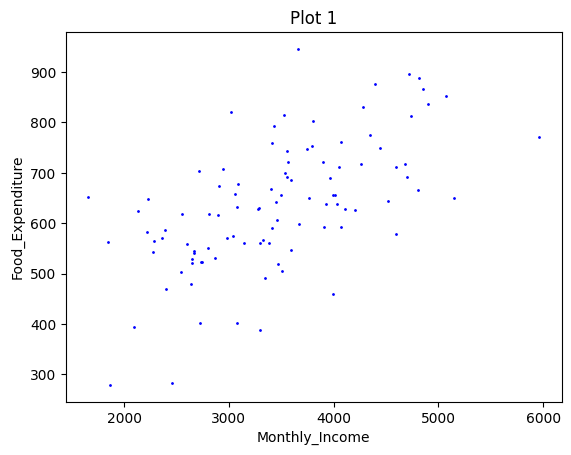

In [ ]:
# SOLUTION (für einen einzigen Plot)
plt.scatter(data[:, 1], data[:, 0], color='blue', s=1)
plt.xlabel('Monthly_Income')
plt.ylabel('Food_Expenditure')
plt.title('Plot 1')
plt.show()

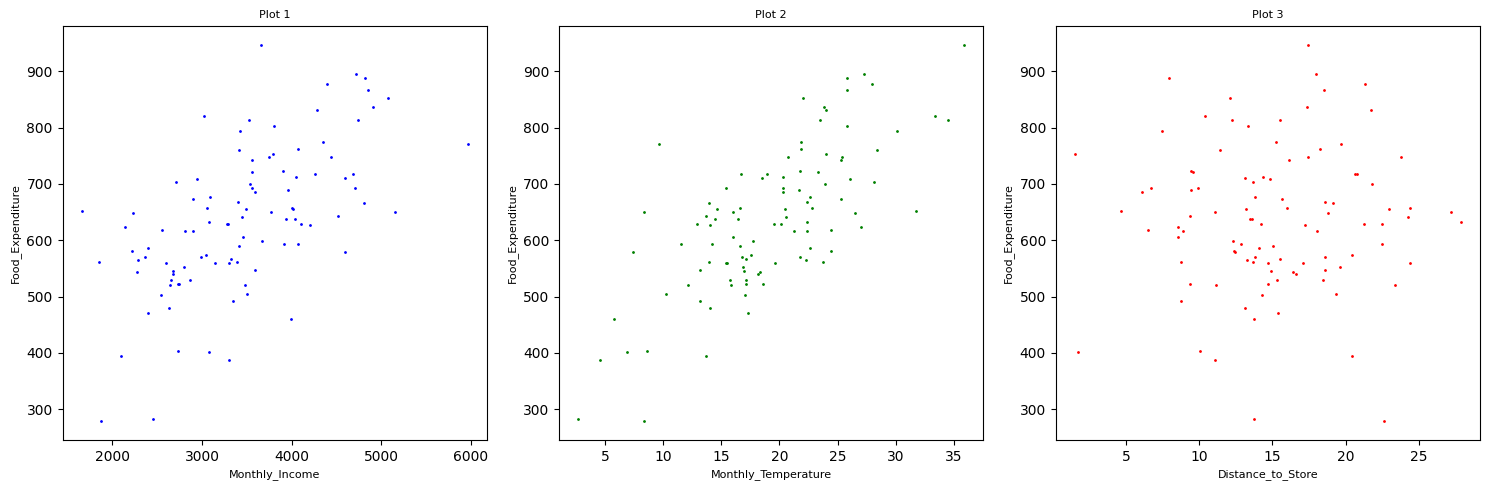

In [ ]:
# SOLUTION (für alle drei Plots)

# Erstellen Sie eine Figur und drei Achsen (Subplots)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: data[:, 1] gegen data[:, 0]
axs[0].scatter(data[:, 1], data[:, 0], color='blue', s=1)
axs[0].set_xlabel('Monthly_Income', fontsize=8)
axs[0].set_ylabel('Food_Expenditure', fontsize=8)
axs[0].set_title('Plot 1', fontsize=8)

# Plot 2: data[:, 2] gegen data[:, 0]
axs[1].scatter(data[:, 2], data[:, 0], color='green', s=1)
axs[1].set_xlabel('Monthly_Temperature', fontsize=8)
axs[1].set_ylabel('Food_Expenditure', fontsize=8)
axs[1].set_title('Plot 2', fontsize=8)

# Plot 3: data[:, 3] gegen data[:, 0]
axs[2].scatter(data[:, 3], data[:, 0], color='red', s=1)
axs[2].set_xlabel('Distance_to_Store', fontsize=8)
axs[2].set_ylabel('Food_Expenditure', fontsize=8)
axs[2].set_title('Plot 3', fontsize=8)

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

In [17]:

# SOLUTION
solution_21 = {
    "monthly_income": {
        "prediction": True,
        "inference": True
    },
    "average_temperature": {
        "prediction": True,
        "inference": False
    },
    "distance_to_store": {
        "prediction": False,
        "inference": False
    }
}

# solution_21 = {
#     "monthly_income": {
#         "prediction": True,
#         "inference": True
#     },
#     "average_temperature": {
#         "prediction": True,
#         "inference": True
#     },
#     "distance_to_store": {
#         "prediction": True,
#         "inference": True
#     }
# }

test_exercise_21(solution_21)

Test passed.
Monatliches Einkommen in Euro: Der Plot zeigt eine lineare Beziehung zwischen dem monatlichen Einkommen und den Ausgaben. Die Ausgaben steigen mit steigendem monatlichen Einkommen. Deshalb ist eine Vorhersage möglich. Zusätzlich ergibt sich aus dem Kontext der der Variablen x1 und y2, dass sie in einem kausalen Zusammenhang stehen, weshalb eine Messung des Einflusses möglich ist.
Durchschnittliche monatliche Außentemperatur: Der Plot zeigt eine lineare Beziehung zwischen der durchschnittlichen monatlichen Außentemperatur und den Ausgaben. Somit ist auch hier eine Vorhersage möglich. Jedoch stehen diese beiden Größen in keinem kausalen Zusammenhang, weshalb keine Messung des Einflusses möglich ist.
Distanz zum nächsten Supermarkt: Hier liegt weder eine lineare Beziehung noch ein kausaler Zusammenhang vor. Deshalb ist weder eine Vorhersage noch eine Messung des Einflusses möglich.


---
## Aufgabe 3 Anwendung der Regression

### Aufgabe 3.1 Training des Modells

In [18]:
data = read_csv_data('data/REG-DAT-002.csv')

In [19]:
# SOLUTION
x = data[:,1].reshape(-1,1)
y = data[:,0].reshape(-1,1)

# TODO
# x = data[:,?].reshape(-1,1)
# y = data[:,?].reshape(-1,1)

In [ ]:
# SOLUTION
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y)

# TODO
# scaler_x = StandardScaler()
# x_scaled = scaler_x.fit_transform(x)
# y_scaled = ...

In [21]:
reg_model = LinearRegression().fit(x_scaled, y_scaled)

### Aufgabe 3.2 Nutzung des Modells

In [22]:
x_test = np.array([2000.0, 6000.0]).reshape(-1, 1)

In [23]:
# SOLUTION
x_test_scaled = scaler_x.transform(x_test)

# TODO
# x_test_scaled = ???

In [24]:
y_pred_scaled = reg_model.predict(x_test_scaled)

In [25]:
# SOLUTION
x_test = scaler_x.inverse_transform(x_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# TODO
# x_test = scaler_x.inverse_transform(x_test_scaled)
# y_pred = ???

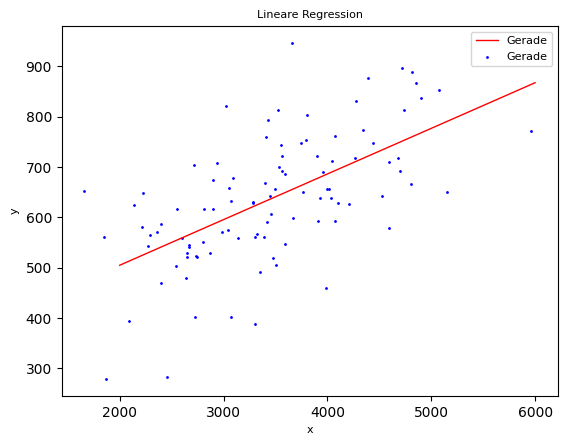

In [26]:
x_data = x_test
y_data = y_pred

# TODO
# x_data = ???
# y_data = ???

plt.plot(x_data, y_data, color='red', linewidth=1, label='Gerade')
plt.scatter(x, y, color='blue', s=1, label='Gerade')
plt.xlabel('x', fontsize=8)
plt.ylabel('y', fontsize=8)
plt.title('Lineare Regression', fontsize=8)
plt.legend(fontsize=8)
plt.show()

In [27]:
b = reg_model.intercept_[0]
m = reg_model.coef_[0,0]

In [28]:
# SOLUTION
y_pred_scaled_2 = b + m * x_test_scaled

# TODO
# y_pred_scaled_2 = ???

In [29]:
# SOLUTION
y_pred_2 = scaler_y.inverse_transform(y_pred_scaled_2)
x_test = scaler_x.inverse_transform(x_test_scaled)

# TODO
# y_pred_2 = ???

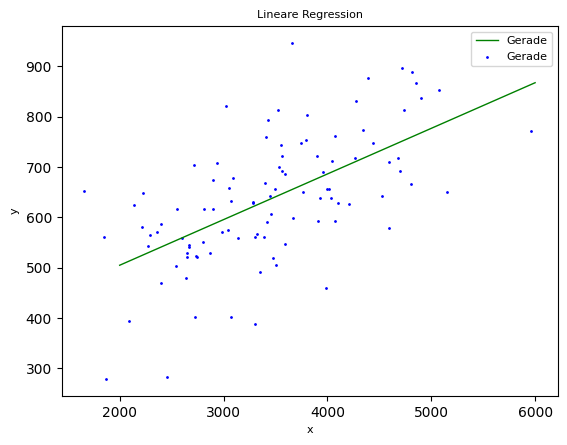

In [ ]:
# SOLUTION
plt.plot(x_test, y_pred_2, color='green', linewidth=1, label='Gerade')
plt.scatter(x, y, color='blue', s=1, label='Gerade')
plt.xlabel('x', fontsize=8)
plt.ylabel('y', fontsize=8)
plt.title('Lineare Regression', fontsize=8)
plt.legend(fontsize=8)
plt.show()

# TODO

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Die Übungsserie begleitend zum AI4ALL-Kurs</span> der <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">EAH Jena</span> ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Namensnennung - Nicht kommerziell - Keine Bearbeitungen 4.0 International Lizenz</a>.

Der AI4ALL-Kurs entsteht im Rahmen des Projekts MoVeKI2EAH. Das Projekt MoVeKI2EAH wird durch das BMBF (Bundesministerium für Bildung und Forschung) und den Freistaat Thüringen im Rahmen der Bund-Länder-Initiative zur Förderung von Künstlicher Intelligenz in der Hochschulbildung gefördert (12/2021 bis 11/2025, Föderkennzeichen 16DHBKI081).